# Compute synthetic photometry for any SVO filters

Obtain synthetic photometry for any photometric filters in [SVO](http://svo2.cab.inta-csic.es/theory/fps/)
and visualize the results.

In [1]:
import seda
from astropy.io import fits, ascii


    SEDA package imported


Read the spectrum of interest.

As an example here, let's read the near-infrared IRTF/SpeX spectrum for the T8 (~750 K) brown dwarf 2MASS J04151954-0935066 in [Burgasser et al. (2004)](https://ui.adsabs.harvard.edu/abs/2004AJ....127.2856B/abstract):

In [2]:
# SpeX spectrum
SpeX_name = 'data/IRTF_SpeX_0415-0935.dat'
SpeX = ascii.read(SpeX_name)
wl_SpeX = SpeX['wl(um)'] # um 
flux_SpeX = SpeX['flux(erg/s/cm2/A)'] # erg/s/cm2/A
eflux_SpeX = SpeX['eflux(erg/s/cm2/A)'] # erg/s/cm2/A

Obtain synthetic photometry for photometric filters with spectral coverage using [SVO filter IDs](http://svo2.cab.inta-csic.es/theory/fps/).

In [4]:
# define filter IDs
filters = (['PAN-STARRS/PS1.y', 
            'UKIRT/UKIDSS.Y', 'UKIRT/UKIDSS.J', 'UKIRT/UKIDSS.H', 'UKIRT/UKIDSS.K',
            '2MASS/2MASS.J', '2MASS/2MASS.H', '2MASS/2MASS.Ks']) # filters of interest

# obtain synthetic photometry
out = seda.synthetic_photometry(wl=wl_SpeX, flux=flux_SpeX, eflux=eflux_SpeX, 
                                flux_unit='erg/s/cm2/A', filters=filters)

Caveat for PAN-STARRS/PS1.y: NO FULL SPECTRAL COVERAGE, so the synthetic photometry is a lower limit


Plot and save the input spectrum with the computed synthetic fluxes

*Note that the PAN-STARRS/PS1.y flux is properly indicated as a lower limit.*

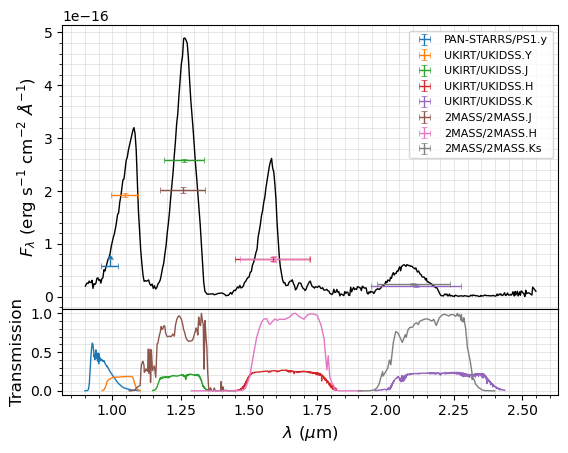

In [5]:
seda.plot_synthetic_photometry(out, save=True)